<a href="https://colab.research.google.com/github/Kundan71/Big-Mart-Sales-Prediction/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Hi Everyone, The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. So now your aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 



## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__

* __Step 5: Features Engineering__
    
* __Step 6: Building Model__


### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Practice/train_v9rqX0R.csv")

In [6]:
df.shape

(8523, 12)

* __We have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.__

In [7]:
#ratio of null values
df.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

* __We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.__

In [8]:
#categorical features
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


### Step 3: Data Cleaning

Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Item_Weight and Outlet_Size have some missing values in the data

__3.1 Item Weight__

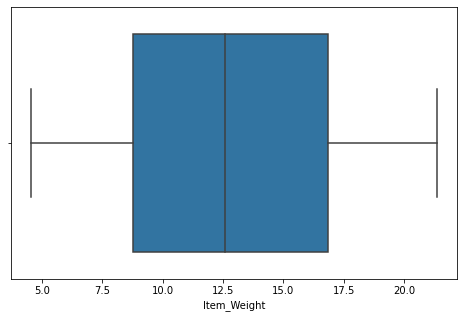

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=df)

__The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"__

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
* Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
* The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

In [12]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
# Imputing with Mean
df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [17]:
df['Item_Weight'].isnull().sum()

0

We have succesfully imputed the missing values from the column Item_Weight

__3.2 : Outlet Size__

In [19]:
df['Outlet_Size'].isnull().sum()

2410

In [21]:
print(df['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


__Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [22]:
#Imputing with Mode
df['Outlet_Size']= df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [23]:
df['Outlet_Size'].isnull().sum()

0

__We have succesfully imputed the missing values from the column Outlet_Size.__

In [24]:
df.loc[train['Item_Visibility']<=0,'Item_Visibility'] = df['Item_Visibility'].mean()

In [27]:
print('Number of 0 values after modification in train data: %d'%sum(df['Item_Visibility'] == 0))

Number of 0 values after modification in train data: 0


### Step 4: Exploratory Data Analysis

In [28]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

__We see there are some irregularities in the column and it is needed to fix them.__

In [31]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [32]:
df['Item_Fat_Content']= df['Item_Fat_Content'].astype(str)

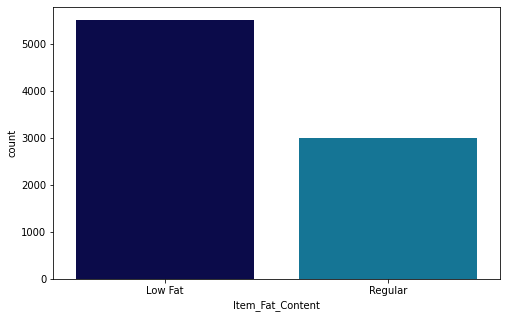

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df,palette='ocean')

__The Items bought are more of Low Fat.__

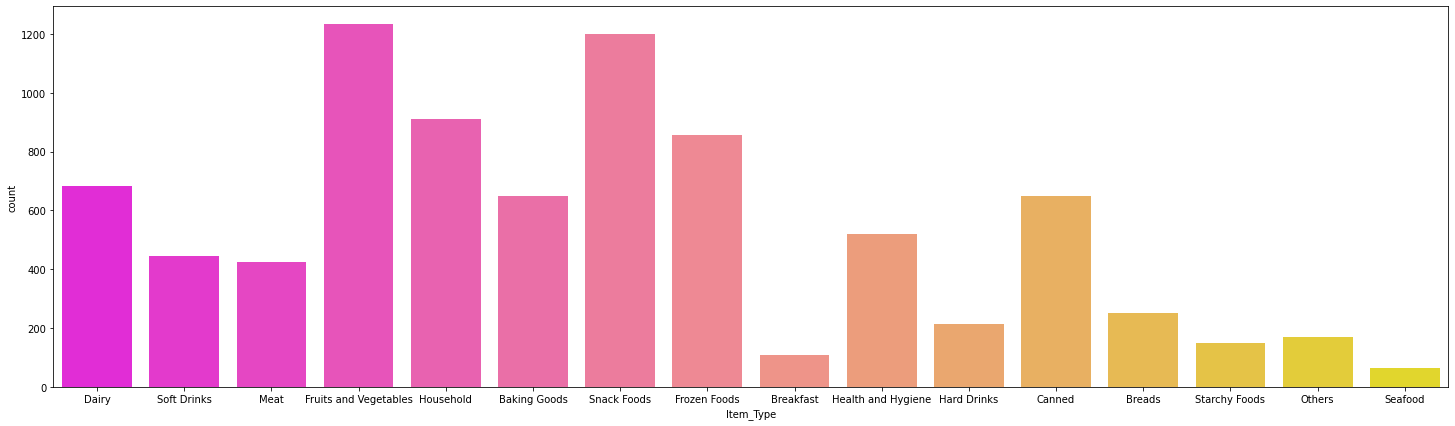

In [34]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=df,palette='spring')

* __Fruits and Vegetables are largely sold as people tend to use them on daily purpose.__
* __Snack Foods too have good sales.__

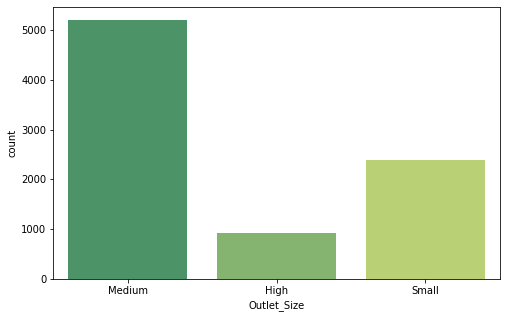

In [35]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=df,palette='summer')

* __The Outlets are more of Medium Size__

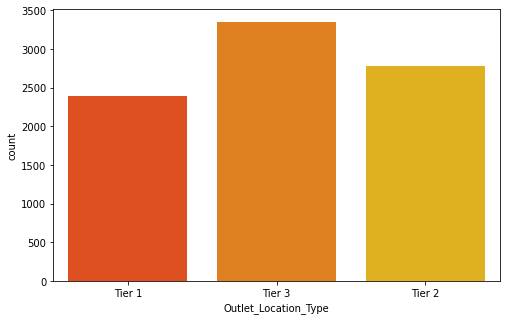

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=df,palette='autumn')

* __The Outlets are maximum in number in Tier 3 Cities__

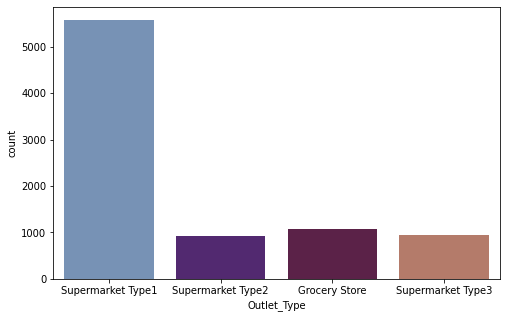

In [37]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=df,palette='twilight')

* __The Outlets are more of Supermarket Type1__

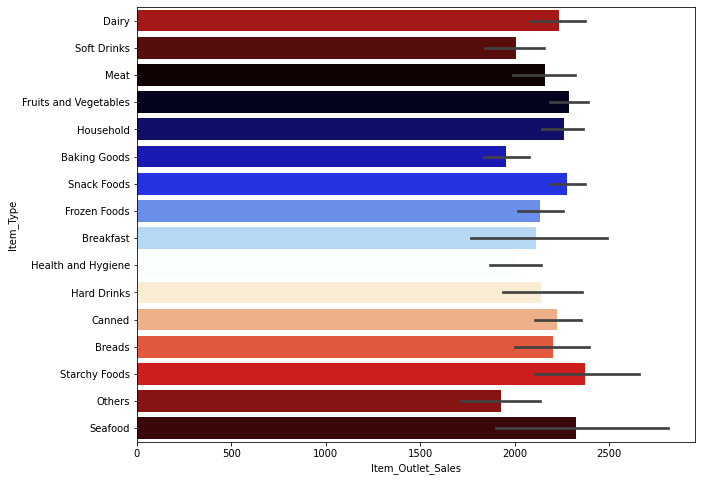

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df,palette='flag')

* __The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.__

### Step 5: Features Engineering

In [18]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(train[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

In [40]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

* Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form.  
* So, for a better impact on sales, we converted them to how old the particular store is?

In [41]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

* For one hot encoding we need to reduce our input variables.

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


In [43]:
data = df.copy()

In [44]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Years',
       'Item_Type_Combined'],
      dtype='object')

In [45]:
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [46]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined'])

In [47]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,14,9,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,4,3,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,14,9,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,1987,994.7052,26,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Outlet_Years               8523 non-null   int64  
 9   Outlet                     8523 non-null   int64  
 10  Item_Fat_Content_0         8523 non-null   uint8  
 11  Item_Fat_Content_1         8523 non-null   uint8  
 12  Outlet_Location_Type_0     8523 non-null   uint8  
 13  Outlet_Location_Type_1     8523 non-null   uint8

* __Encoding the required columns from training dataset__

In [49]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

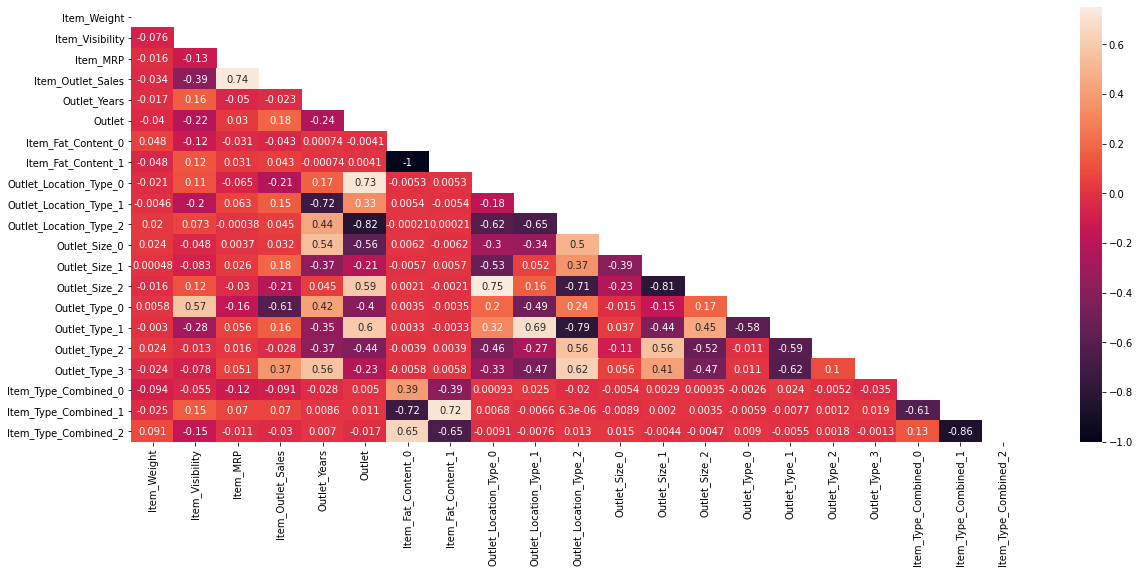

In [53]:
corr_df = data.corr()
matrix = np.triu(corr_df.corr())
plt.figure(figsize=(20,8))
sns.heatmap(corr_df.corr(), annot=True, mask=matrix)

### Step 6: Building Model

In [54]:
# Seperate Features and Target
X= data.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= data['Item_Outlet_Sales']

In [55]:
X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 6404 to 2732
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Weight             6818 non-null   float64
 1   Item_Visibility         6818 non-null   float64
 2   Item_MRP                6818 non-null   float64
 3   Outlet_Years            6818 non-null   int64  
 4   Outlet                  6818 non-null   int64  
 5   Item_Fat_Content_0      6818 non-null   uint8  
 6   Item_Fat_Content_1      6818 non-null   uint8  
 7   Outlet_Location_Type_0  6818 non-null   uint8  
 8   Outlet_Location_Type_1  6818 non-null   uint8  
 9   Outlet_Location_Type_2  6818 non-null   uint8  
 10  Outlet_Size_0           6818 non-null   uint8  
 11  Outlet_Size_1           6818 non-null   uint8  
 12  Outlet_Size_2           6818 non-null   uint8  
 13  Outlet_Type_0           6818 non-null   uint8  
 14  Outlet_Type_1           6818 non-null

In [58]:
X_train.shape, X_valid.shape

((6818, 20), (1705, 20))

# **Linear Regression Model**

In [59]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()

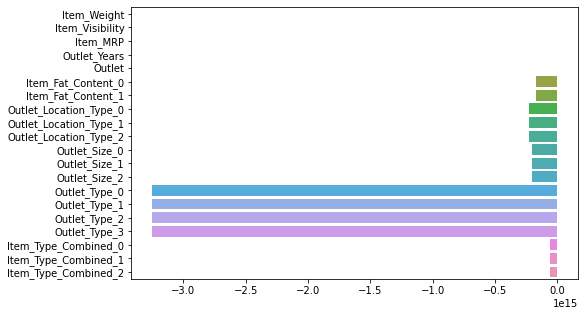

In [60]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

In [61]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
r2_score = metrics.r2_score(y_valid,y_pred)
print("Root Mean Squared Error:",rmse)
print("r2_score:",r2_score)

Root Mean Squared Error: 1129.2869968964762
r2_score: 0.5642807104658439


# **Cross Validation with Ridge Model to find best alpha value**

In [62]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge(normalize=True)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [66]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -1275252.4916099044


# **Ridge Model**

In [67]:
# Ridge Model Building
ridge = Ridge(alpha= 0.0001,normalize=True)
ridge.fit(X_train,y_train)
coef2 = pd.Series(ridge.coef_, features).sort_values()

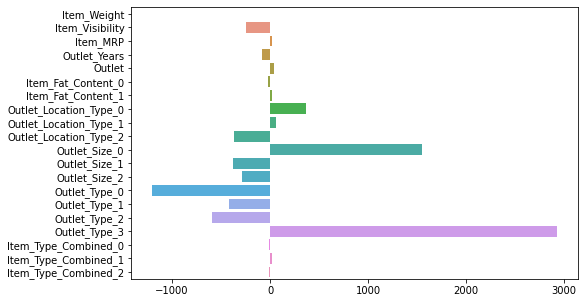

In [68]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(ridge.coef_,features)

In [69]:
y_pred = ridge.predict(X_valid)

In [70]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
rmse = sqrt(MSE)
r2_score = metrics.r2_score(y_valid,y_pred)
print("Root Mean Squared Error:",rmse)
print("r2_score:",r2_score)

Root Mean Squared Error: 1129.2744184111632
r2_score: 0.5642904168702849


# **Cross Validation for Lasso Model to find best alpha value**

In [71]:
lasso = Lasso(normalize=True)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [72]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -1275260.5124857263


# **Lasso Model**

In [73]:
lasso = Lasso(alpha=1e-15 , max_iter= 3000, normalize=True)
lasso.fit(X_train, y_train)
coef3 = pd.Series(lasso.coef_, features).sort_values()

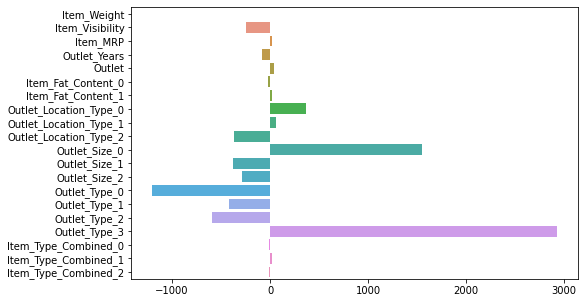

In [74]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(ridge.coef_,features)

In [75]:
y_pred = lasso.predict(X_valid)

In [76]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
rmse = sqrt(MSE)
r2_score = metrics.r2_score(y_valid,y_pred)
print("Root Mean Squared Error:",rmse)
print("r2_score:",r2_score)

Root Mean Squared Error: 1129.2940104693605
r2_score: 0.5642752982748024


# **Random Forest Model**

In [77]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [78]:
y_pred = RF.predict(X_valid)

In [79]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
rmse = sqrt(MSE)
r2_score = metrics.r2_score(y_valid,y_pred)
print("Root Mean Squared Error:",rmse)
print("r2_score:",r2_score)

Root Mean Squared Error: 1095.87564379703
r2_score: 0.5896818941884407


In [ ]:
{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
 'max_features': ['auto', 'sqrt'], 
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 
 'min_samples_split': [2, 5, 10], 
 'min_samples_leaf': [1, 2, 4], 
 'bootstrap': [True, False]}


In [84]:
RF = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=2,n_jobs=8)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_valid)

In [85]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
rmse = sqrt(MSE)
r2_score = metrics.r2_score(y_valid,y_pred)
print("Root Mean Squared Error:",rmse)
print("r2_score:",r2_score)

Root Mean Squared Error: 1091.815248701788
r2_score: 0.5927168500901248


# **Cross Validation for RandomForest Model**

In [86]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [100, 200, 300, 1000]
#}

#rf = RandomForestRegressor()
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                          cv = 3, n_jobs = -1, verbose = 2)
#grid_search.fit(X_train, y_train)

# **Gradient Boosting Regressor Model**

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [89]:
# standardizing them
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_valid)

In [90]:
# Getting best alpha value for Gradient Boosting Model
gbm = GradientBoostingRegressor()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
gbm_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
gbm_regressor.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1e-15, copy_X=True, fit_intercept=True,
                             max_iter=3000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [91]:
print("The best fit alpha value is found out to be :" ,gbm_regressor.best_params_)
print("\nUsing ",gbm_regressor.best_params_, " the negative mean squared error is: ", gbm_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -1275267.099295626


In [92]:
gbm = GradientBoostingRegressor(learning_rate=0.0001)
gbm.fit(X_train_std, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.0001, loss='ls',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
y_pred = gbm.predict(X_test_std)

In [95]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
rmse = sqrt(MSE)
r2_score = metrics.r2_score(y_valid,y_pred)
print("Root Mean Squared Error:",rmse)
print("r2_score:",r2_score)

Root Mean Squared Error: 1701.7816493758548
r2_score: 0.010522770631006595


In [ ]:
# Function to calculate VIF
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#def calc_vif(X):

    # Calculating VIF
#    vif = pd.DataFrame()
#    vif["variables"] = X.columns
#    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#    return(vif)

#p=train.drop(['Item_Outlet_Sales'],axis=1)
#calc_vif(p)

* **Multicollinearity Check for one hot encoding**